### Importando as bibliotecas

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
df = pd.read_csv('top10s.csv', encoding='latin1')
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [67]:
df[df['year'] == 2014]

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
229,230,She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,33,44,202,0,13,71
249,250,Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61
265,266,It's On Again - Main Soundtrack,Alicia Keys,hip pop,2014,110,54,64,-9,25,53,230,10,11,30
221,222,Problem,Ariana Grande,dance pop,2014,103,81,66,-5,16,63,194,2,15,75
238,239,Mmm Yeah (feat. Pitbull),Austin Mahone,dance pop,2014,126,92,71,-4,27,98,232,0,4,65
217,218,Hey Brother,Avicii,big room,2014,125,78,55,-5,8,46,255,3,4,78
222,223,Pompeii,Bastille,metropopolis,2014,127,72,68,-6,27,57,214,8,4,73
253,254,XO,Beyoncé,dance pop,2014,170,79,47,-9,31,21,216,17,26,56
241,242,Partition,Beyoncé,dance pop,2014,186,44,41,-12,31,17,319,3,29,65
256,257,Drunk in Love,Beyoncé,dance pop,2014,140,62,59,-7,18,40,323,1,5,52


In [6]:
artistas_mais_ouvidos = df['artist'].value_counts().reset_index()
artistas_mais_ouvidos.columns = ['Artista', 'Quantidade de vezes no top 10']

artistas_mais_ouvidos = artistas_mais_ouvidos.sort_values('Quantidade de vezes no top 10', ascending=False)

artistas_mais_ouvidos.head(20)


,Artista,Quantidade de vezes no top 10
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Shawn Mendes,11
7,Pitbull,11
8,Ed Sheeran,11
9,The Chainsmokers,11


In [8]:
generos_mais_ouvidos = df['top genre'].value_counts().reset_index()
generos_mais_ouvidos.columns=['Genero', 'Quantidade de vezes no top 10']
generos_mais_ouvidos = generos_mais_ouvidos.sort_values('Quantidade de vezes no top 10', ascending=False)

generos_mais_ouvidos.head(20)

,Genero,Quantidade de vezes no top 10
0,dance pop,327
1,pop,60
2,canadian pop,34
3,barbadian pop,15
4,boy band,15
5,electropop,13
6,british soul,11
7,big room,10
8,canadian contemporary r&b,9
9,neo mellow,9


In [18]:
average_duration = df.groupby('year')['dur'].mean()
pd.DataFrame(average_duration)

,dur
year,
2010,229.803922
2011,242.566038
2012,224.400000
2013,234.492958
2014,224.155172
2015,223.368421
2016,220.225000
2017,222.169231
2018,217.187500


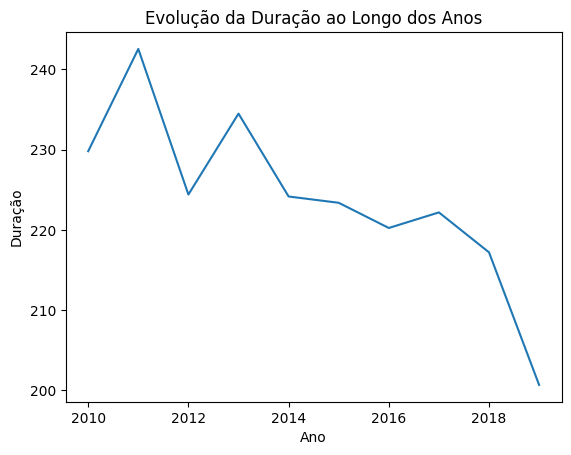

In [19]:
# Criar o gráfico de linha
plt.plot(average_duration.index, average_duration.values)

# Definir os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Duração')

# Definir o título do gráfico
plt.title('Evolução da Duração ao Longo dos Anos')

# Exibir o gráfico
plt.show()


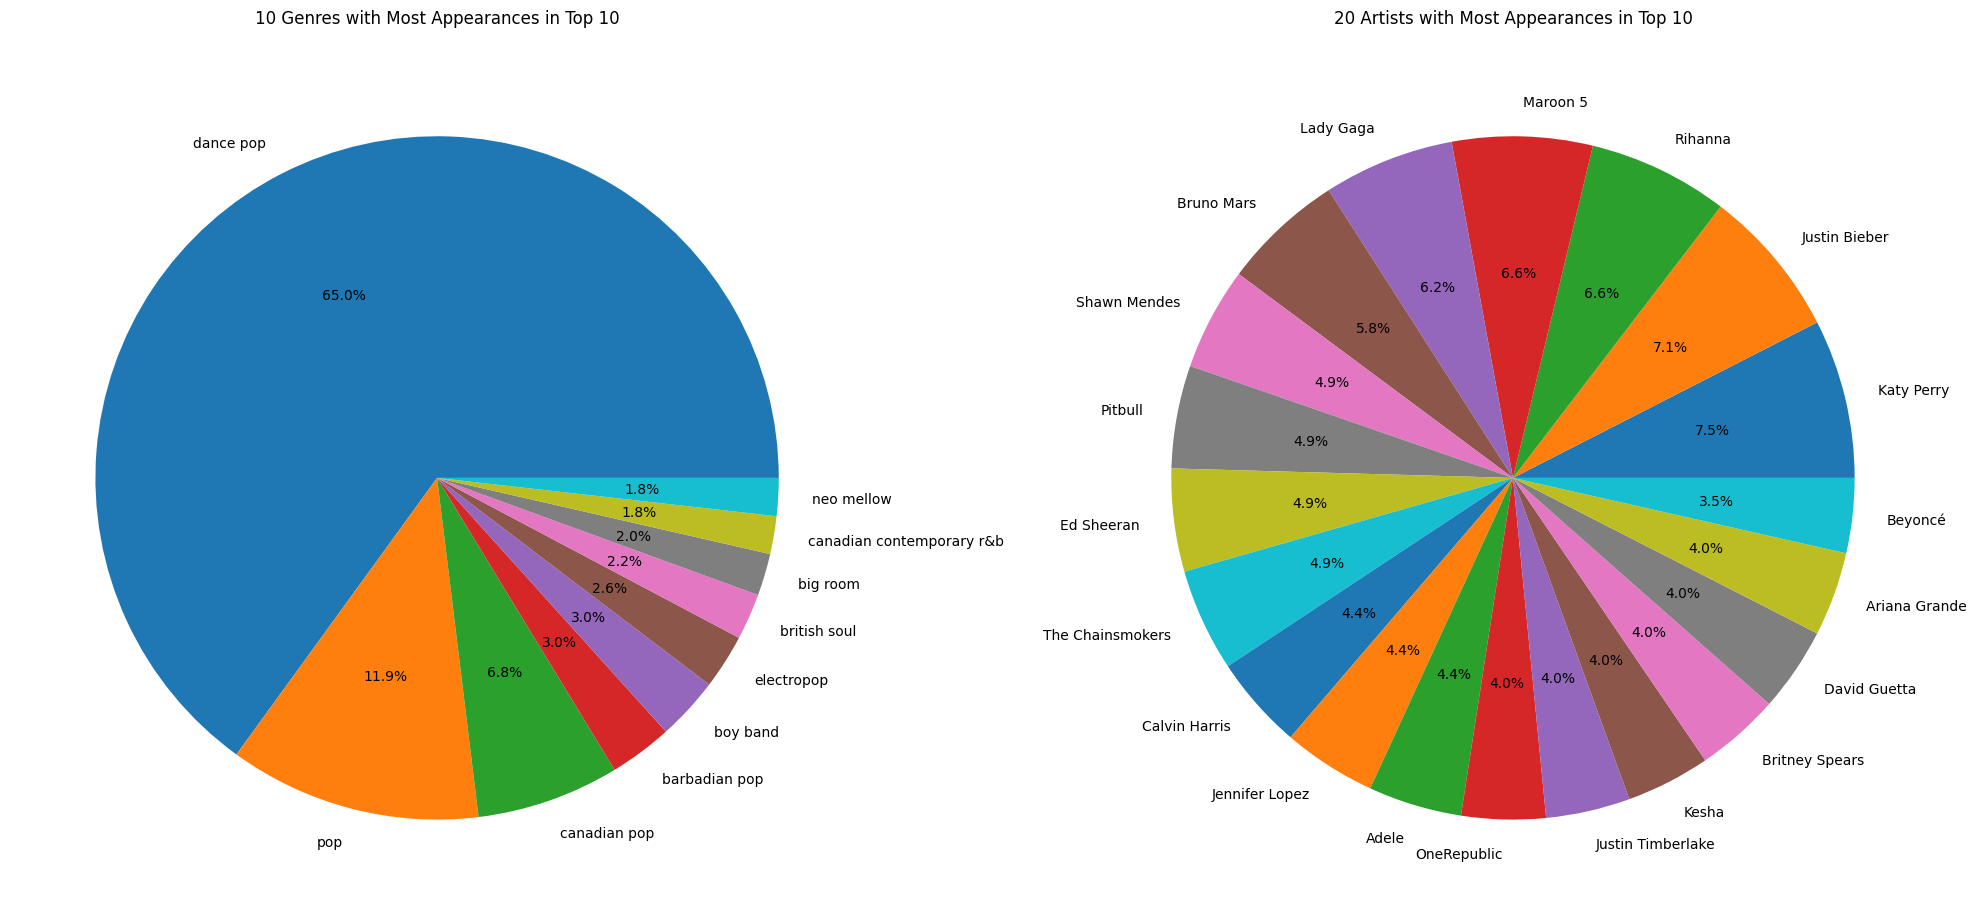

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the pie chart for genres
axs[0].pie(generos_mais_ouvidos.head(10)['Quantidade de vezes no top 10'], labels=generos_mais_ouvidos.head(10)['Genero'], autopct='%1.1f%%')
axs[0].set_title('10 Genres with Most Appearances in Top 10', pad=20)

# Plot the pie chart for artists
axs[1].pie(artistas_mais_ouvidos.head(20)['Quantidade de vezes no top 10'], labels=artistas_mais_ouvidos.head(20)['Artista'], autopct='%1.1f%%')
axs[1].set_title('20 Artists with Most Appearances in Top 10', pad=20)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
